In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
pd.set_option('display.max_columns', None)

In [4]:
# Training set
ts_i = pd.read_csv('./Data/features_inter.csv')
ts_u = pd.read_csv('./Data/features_union.csv')
ts_i = ts_i.drop(['parcelid','logerror'],axis=1)
ts_u = ts_u.drop(['parcelid','logerror'],axis=1)
ts_i.head()

,Zestimate,finishedsquarefeet12,lotsizesquarefeet,taxamount,longitude,latitude,regionidzip,yearbuilt,month
0,10279.844084,1684.0,7528.0,6735.880000,-118.488536,34.280990,96370.0,1959.0,1
1,8450.157608,2263.0,3643.0,10153.020000,-117.677556,33.668120,96962.0,2014.0,1
2,9960.079893,2217.0,11423.0,5984.582647,-118.175032,34.136312,96293.0,1940.0,1
3,10220.393562,839.0,70859.0,3048.740000,-118.309000,33.755800,96222.0,1987.0,1
4,9950.124792,2283.0,6000.0,5488.960000,-117.700234,33.485643,96961.0,1981.0,1


In [7]:
def mape_loss(t,p):
    sum = 0
    for i in range(t.shape[0]):
        sum += abs(t[i]-p[i])
    return sum/t.shape[0]
def metric_rf(X_train, y_train, X_test, y_test, model, cri):
    print(model)
    fit_time = 0
    score_time = 0
    test_score = 0
    train_score = 0
    result = cross_validate(model, X_test, y_test, scoring=cri)
    for i in range(3):
        fit_time += result['fit_time'][i]
        score_time += result['score_time'][i]
        test_score += result['test_score'][i]
        train_score += result['train_score'][i]
    pred = model.predict(X_test)
    m = mape_loss(y_test, pred)
    return [fit_time/3, score_time/3, test_score/3, train_score/3, m]
# def mapeobj(preds,dtrain):
#     gaps = dtrain.get_label()
#     grad = np.sign(preds-gaps)/gaps
#     hess = 1/gaps
#     grad[(gaps==0)] = 0
#     hess[(gaps==0)] = 0
#     return grad,hess  

# def evalmape(preds, dtrain):
#     gaps = dtrain.get_label()
#     err = abs(gaps-preds)/gaps
#     err[(gaps==0)] = 0
#     err = np.mean(err)
#     return 'error',err 

In [ ]:
# Random Forest with MSE
ts_list = [ts_i,ts_u]
model_list = []
frames = []
for m in ts_list:
    for i in range(5):
        for j in range(5):
            print("Round %d:" % (i*5+j+1))
            
            # Training set
            ts = m
            y = ts[['Zestimate']]
            X = ts.drop('Zestimate',axis=1)
            
            # Split data with 0.75
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
            print (X_train.shape)
            print (y_train.shape)
            print (X_test.shape)
            print (y_test.shape)
            
            rf = RandomForestRegressor(n_estimators=5*(i+1), criterion='mse', max_depth=5*(j+1), random_state=10)
            rf.fit(X_train, y_train)
            model_list.append(rf)
            metric = metric_rf(X_train, np.array(y_train), X_test, np.array(y_test), rf, 'neg_mean_squared_error')
            print(metric)
            result = pd.DataFrame.from_items([(i*5+j,metric)],\
                                             orient='index',\
                                             columns=['fit_time','score_time','test_score','train_score','MAPE'])
            frames.append(result)
            print("****************************")
m = pd.concat(frames)
print(m)

Round 1:
(115563, 8)
(115563, 1)
(49528, 8)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[0.33197728792826336, 0.0038106441497802734, -383803.88931262627, -377409.50934289722, array([ 426.52867406])]
****************************
Round 2:
(115563, 8)
(115563, 1)
(49528, 8)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[0.95172301928202307, 0.010130564371744791, -394114.33495417709, -350726.6679889732, array([ 430.92348963])]
****************************
Round 3:
(115563, 8)
(115563, 1)
(49528, 8)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[0.8226311206817627, 0.010568539301554361, -408255.76802905236, -282169.5039424948, array([ 439.87576379])]
****************************
Round 4:
(115563, 8)
(115563, 1)
(49528, 8)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[1.0447766780853271, 0.015839258829752605, -429644.28544911818, -210582.77612384353, array([ 455.84120622])]
****************************
Round 5:
(115563, 8)
(115563, 1)
(49528, 8)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[1.2031112511952717, 0.024045467376708984, -453897.54509646958, -146358.29835262746, array([ 470.81247959])]
****************************
Round 6:
(115563, 8)
(115563, 1)
(49528, 8)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[0.60872165362040198, 0.0059481461842854815, -388231.20959342777, -381593.02989781386, array([ 429.65360566])]
****************************
Round 7:
(115563, 8)
(115563, 1)
(49528, 8)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[1.2006645997365315, 0.011667728424072266, -388371.11148809781, -343999.92305100663, array([ 428.68866555])]
****************************
Round 8:
(115563, 8)
(115563, 1)
(49528, 8)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[1.8161594072977703, 0.02027130126953125, -391201.1114232291, -274305.08200991148, array([ 432.08370671])]
****************************
Round 9:
(115563, 8)
(115563, 1)
(49528, 8)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[2.3247849941253662, 0.035815000534057617, -409208.94532666059, -185450.45414794431, array([ 442.36954742])]
****************************
Round 10:
(115563, 8)
(115563, 1)
(49528, 8)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[2.5681144396464028, 0.048683643341064453, -421332.57178289461, -129504.9720204131, array([ 452.59849305])]
****************************
Round 11:
(115563, 8)
(115563, 1)
(49528, 8)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[0.97587037086486816, 0.010878960291544596, -383287.45241584972, -376372.72281161154, array([ 425.57215168])]
****************************
Round 12:
(115563, 8)
(115563, 1)
(49528, 8)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[2.0053474108378091, 0.017016013463338215, -386403.08797370241, -343109.73782797199, array([ 428.29639218])]
****************************
Round 13:
(115563, 8)
(115563, 1)
(49528, 8)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[2.7423563003540039, 0.03277134895324707, -398210.98785909754, -271045.36899065325, array([ 434.22517246])]
****************************
Round 14:
(115563, 8)
(115563, 1)
(49528, 8)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[3.6529630025227866, 0.051992734273274742, -400966.20799046877, -185822.32076401441, array([ 436.79667539])]
****************************
Round 15:
(115563, 8)
(115563, 1)
(49528, 8)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[4.0360667705535889, 0.075059652328491211, -406059.71924058505, -121372.58039147487, array([ 442.79299279])]
****************************
Round 16:
(115563, 8)
(115563, 1)
(49528, 8)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[1.293851375579834, 0.012570619583129883, -381852.61381362093, -375597.20788729546, array([ 426.4819031])]
****************************
Round 17:
(115563, 8)
(115563, 1)
(49528, 8)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[2.5947689215342202, 0.02657945950826009, -385788.51854708005, -341187.59283855674, array([ 427.6563641])]
****************************
Round 18:
(115563, 8)
(115563, 1)
(49528, 8)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[3.5945137341817222, 0.042037169138590492, -390143.35986303032, -272150.767625409, array([ 429.50350903])]
****************************
Round 19:
(115563, 8)
(115563, 1)
(49528, 8)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[4.2856322924296064, 0.064475615819295243, -396253.9835456197, -174636.58633193219, array([ 434.11256186])]
****************************
Round 20:
(115563, 8)
(115563, 1)
(49528, 8)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[5.7711518605550127, 0.084640105565388993, -405196.04344779393, -126552.23351492954, array([ 442.12743137])]
****************************
Round 21:
(115563, 8)
(115563, 1)
(49528, 8)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[1.9060711065928142, 0.016365289688110352, -387785.47049721354, -381692.58396231453, array([ 428.71419968])]
****************************
Round 22:
(115563, 8)
(115563, 1)
(49528, 8)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[3.090693155924479, 0.03275752067565918, -375834.75112135865, -333740.739932483, array([ 422.40244369])]
****************************
Round 23:
(115563, 8)
(115563, 1)
(49528, 8)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[4.3234852155049639, 0.053083658218383789, -387127.00337879988, -270338.43597938371, array([ 427.55945585])]
****************************
Round 24:
(115563, 8)
(115563, 1)
(49528, 8)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[6.176369110743205, 0.098011970520019531, -397364.90572341526, -172806.00559103131, array([ 434.33455486])]
****************************
Round 25:
(115563, 8)
(115563, 1)
(49528, 8)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[6.7001922130584717, 0.11828343073527019, -398628.29902239447, -115308.40098379592, array([ 438.44633822])]
****************************
Round 1:
(115563, 11)
(115563, 1)
(49528, 11)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[0.35317484537760419, 0.0046722094217936201, -387150.43967524014, -380532.64021191746, array([ 428.90865783])]
****************************
Round 2:
(115563, 11)
(115563, 1)
(49528, 11)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[0.68988807996114099, 0.0071606636047363281, -389320.43685214873, -341316.40605608933, array([ 429.35111205])]
****************************
Round 3:
(115563, 11)
(115563, 1)
(49528, 11)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[0.99228612581888831, 0.013300259908040365, -407818.48754099151, -273076.9285449576, array([ 438.0197937])]
****************************
Round 4:
(115563, 11)
(115563, 1)
(49528, 11)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[1.291018009185791, 0.016583919525146484, -428150.83683069563, -212751.64102410711, array([ 454.80685929])]
****************************
Round 5:
(115563, 11)
(115563, 1)
(49528, 11)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[1.4553476969401042, 0.023765405019124348, -451923.93876721925, -155714.5266591252, array([ 472.41223995])]
****************************
Round 6:
(115563, 11)
(115563, 1)
(49528, 11)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[0.73132117589314782, 0.006630818049112956, -378867.02530231589, -372033.49406865006, array([ 424.60609162])]
****************************
Round 7:
(115563, 11)
(115563, 1)
(49528, 11)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[1.3541185855865479, 0.012218316396077475, -386832.2674067691, -342446.3240163115, array([ 428.6225184])]
****************************
Round 8:
(115563, 11)
(115563, 1)
(49528, 11)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[1.9690546989440918, 0.021344264348347981, -391425.31587824313, -267433.70683379198, array([ 431.02684972])]
****************************
Round 9:
(115563, 11)
(115563, 1)
(49528, 11)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[2.4625849723815918, 0.033785740534464516, -405902.01920643821, -187132.36459522811, array([ 443.72026985])]
****************************
Round 10:
(115563, 11)
(115563, 1)
(49528, 11)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[2.9645771185557046, 0.053374528884887695, -419088.61312607903, -138958.87884106048, array([ 451.77373244])]
****************************
Round 11:
(115563, 11)
(115563, 1)
(49528, 11)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[1.0672937234242756, 0.0096599260965983067, -385713.2221633005, -379222.09568529256, array([ 427.60452945])]
****************************
Round 12:
(115563, 11)
(115563, 1)
(49528, 11)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[2.0930177370707193, 0.019401629765828449, -385655.31174590829, -341526.83279854705, array([ 428.29849453])]
****************************
Round 13:
(115563, 11)
(115563, 1)
(49528, 11)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[3.0071586767832437, 0.030909061431884766, -388641.43015007232, -266432.93616985303, array([ 428.85921508])]
****************************
Round 14:
(115563, 11)
(115563, 1)
(49528, 11)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[3.5576860904693604, 0.044987201690673828, -400736.68123145803, -181379.36709880867, array([ 434.37150486])]
****************************
Round 15:
(115563, 11)
(115563, 1)
(49528, 11)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[4.1138656139373779, 0.064493020375569657, -411346.82417344738, -120669.24414654019, array([ 446.53235097])]
****************************
Round 16:
(115563, 11)
(115563, 1)
(49528, 11)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[1.3370083173116047, 0.011368036270141602, -384628.64529995463, -377664.9271744499, array([ 427.99181476])]
****************************
Round 17:
(115563, 11)
(115563, 1)
(49528, 11)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[2.6062829494476318, 0.023674964904785156, -382931.00462498964, -338898.33961415844, array([ 425.15771155])]
****************************
Round 18:
(115563, 11)
(115563, 1)
(49528, 11)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[3.8623337745666504, 0.037995576858520508, -392375.01780824288, -266554.6896007355, array([ 430.01899603])]
****************************
Round 19:
(115563, 11)
(115563, 1)
(49528, 11)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[4.8322126865386963, 0.060793956120808922, -399705.41402959329, -186823.61550973053, array([ 436.38504195])]
****************************
Round 20:
(115563, 11)
(115563, 1)
(49528, 11)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[5.5013483365376787, 0.08784707387288411, -398637.11080383201, -118448.96837164911, array([ 439.79762546])]
****************************
Round 21:
(115563, 11)
(115563, 1)
(49528, 11)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[1.6923625469207764, 0.014982461929321289, -382282.07618030108, -376112.05970401358, array([ 426.37608407])]
****************************
Round 22:
(115563, 11)
(115563, 1)
(49528, 11)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[3.2118470668792725, 0.029529333114624023, -380211.55986593076, -333958.00199976092, array([ 424.16442793])]
****************************
Round 23:
(115563, 11)
(115563, 1)
(49528, 11)
(49528, 1)


/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [6]:
rf_best = RandomForestRegressor(n_estimators=5, criterion='mse', max_depth=5, random_state=10)
rf_best.fit(X_train, y_train)

/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [74]:
pickle.dump(rf_best, open('random_forest.pkl','wb'))
my_rf = pickle.load(open('random_forest.pkl','rb'))
my_rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [85]:
rf.predict(X_train)
X_train.head()


,taxamount,longitude,latitude,bedroomcnt,calculatedfinishedsquarefeet,lotsizesquarefeet,regionidzip,month,yearbuilt
92419,4385.60,-117951014.0,34072016.0,3.0,1108.000000,7838.0,96523.0,1,1951.0
101494,8368.28,-119214085.0,34219806.0,5.0,1778.937893,7384.0,97107.0,2,2012.0
119091,4081.99,-118289000.0,33829600.0,3.0,1071.000000,61814.0,96160.0,4,1997.0
32069,1214.88,-117898724.0,33933690.0,3.0,1388.000000,6660.0,97035.0,5,1971.0
141042,4180.90,-118161436.0,34588218.0,4.0,1995.000000,7010.0,97329.0,6,1992.0


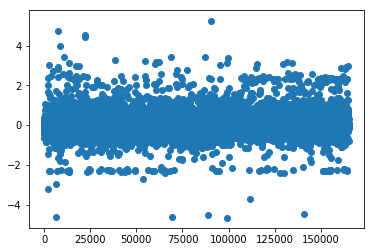

In [40]:
plt.figure("Log error scatter of 2016")
plt.scatter(range(temp.shape[0]), np.sort(temp.values))
plt.show()

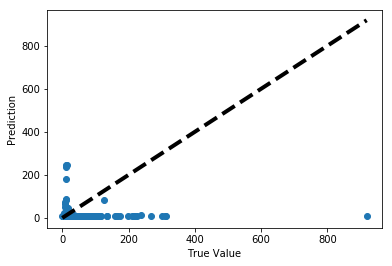

In [32]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('True Value')
ax.set_ylabel('Prediction')
plt.show()